# Required libraries

In [ ]:
 !pip install asyncpraw
 !pip install asyncio

In [ ]:
import os
import asyncio
import asyncpraw
import csv
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# quick test

In [ ]:
import asyncio
import asyncpraw
import csv

async def fetch_posts():
    # Set up Reddit API authentication
    reddit = asyncpraw.Reddit(
        client_id=os.getenv('REDDIT_CLIENT_ID'),
        client_secret=os.getenv('REDDIT_CLIENT_SECRET'),
        user_agent=os.getenv('REDDIT_USER_AGENT')
    )
    # List of subreddits to scrape
    subreddits = ['ForeverAlone', 'TIFU']  # Add more subreddit names as needed

    for subreddit_name in subreddits:
        # Access the subreddit
        subreddit = await reddit.subreddit(subreddit_name)

        # Open a CSV file for each subreddit
        filename = f'{subreddit_name}_posts.csv'
        with open(filename, 'w', newline='', encoding='utf-8-sig') as csvfile:
            # Create a CSV writer object
            fieldnames = ['Title', 'URL', 'Content']
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

            # Write the header
            writer.writeheader()

            # Collect a fixed number of posts from the subreddit
            post_counter = 0
            async for post in subreddit.new(limit=100):  # Adjust limit as desired
                # Write the post title, URL, and content to the CSV file
                writer.writerow({
                    'Title': post.title,
                    'URL': post.url,
                    'Content': post.selftext
                })
                post_counter += 1

            print(f"Saved {post_counter} posts from r/{subreddit_name} in {filename}")

# Run the async function using the existing event loop
await fetch_posts()


Saved 100 posts from r/ForeverAlone in ForeverAlone_posts.csv
Saved 100 posts from r/TIFU in TIFU_posts.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Scraping test 1

In [ ]:
import asyncio
import asyncpraw
import csv
import os
from google.colab import drive


async def fetch_posts():
    # Set up Reddit API authentication
    reddit = asyncpraw.Reddit(
        client_id=os.getenv('REDDIT_CLIENT_ID'),
        client_secret=os.getenv('REDDIT_CLIENT_SECRET'),
        user_agent=os.getenv('REDDIT_USER_AGENT')
    )

    # Define the folder path in Google Drive
    save_directory = '/content/drive/MyDrive/Reddit_Data_Collection'
    os.makedirs(save_directory, exist_ok=True)

    # List of subreddits to scrape
    subreddits = [
        'Sad',
        'ForeverAlone',
        'Self',
        'selfimprovement',
        'tifu',
        'Anxiety',
        'Avoidant',
        'socialanxiety',
        'unpopularopinion',
        'SuicideWatch',
        'RedditForGrownups',
        'CasualConversation',
        'SeriousConversation',
        'DeepThoughts'
    ]

    for subreddit_name in subreddits:
        # Access the subreddit
        subreddit = await reddit.subreddit(subreddit_name)

        # Define the CSV file path for the subreddit
        filename = os.path.join(save_directory, f'{subreddit_name}_posts.csv')
        with open(filename, 'w', newline='', encoding='utf-8-sig') as csvfile:
            # Create a CSV writer object with an additional 'Post ID' field
            fieldnames = ['Post ID', 'Title', 'URL', 'Content']
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

            # Write the header
            writer.writeheader()

            # Collect a fixed number of posts from the subreddit
            post_counter = 0
            async for post in subreddit.top(time_filter='all' , limit=20000):  # Adjust limit as desired
                # Check if the post is a text post and has no media
                if post.selftext.strip() and not post.is_video and not post.url.endswith(('.jpg', '.jpeg', '.png', '.gif')):
                    # Write the post ID, title, URL, and content to the CSV file
                    writer.writerow({
                        'Post ID': post.id,
                        'Title': post.title,
                        'URL': post.url,
                        'Content': post.selftext
                    })
                    post_counter += 1

            print(f"Saved {post_counter} posts with text from r/{subreddit_name} in {filename}")

# Run the async function using the existing event loop
await fetch_posts()


Saved 279 posts with text from r/Sad in /content/drive/MyDrive/Reddit_Data_Collection/Sad_posts.csv


ERROR:asyncio:Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x7e584c1ca740>
ERROR:asyncio:Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x7e584c314bb0>
ERROR:asyncio:Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x7e584c315000>


Saved 296 posts with text from r/ForeverAlone in /content/drive/MyDrive/Reddit_Data_Collection/ForeverAlone_posts.csv
Saved 857 posts with text from r/Self in /content/drive/MyDrive/Reddit_Data_Collection/Self_posts.csv
Saved 1000 posts with text from r/selfimprovement in /content/drive/MyDrive/Reddit_Data_Collection/selfimprovement_posts.csv
Saved 989 posts with text from r/tifu in /content/drive/MyDrive/Reddit_Data_Collection/tifu_posts.csv
Saved 770 posts with text from r/Anxiety in /content/drive/MyDrive/Reddit_Data_Collection/Anxiety_posts.csv
Saved 649 posts with text from r/Avoidant in /content/drive/MyDrive/Reddit_Data_Collection/Avoidant_posts.csv
Saved 31 posts with text from r/socialanxiety in /content/drive/MyDrive/Reddit_Data_Collection/socialanxiety_posts.csv
Saved 983 posts with text from r/unpopularopinion in /content/drive/MyDrive/Reddit_Data_Collection/unpopularopinion_posts.csv
Saved 866 posts with text from r/SuicideWatch in /content/drive/MyDrive/Reddit_Data_Collec

# Refer to this code to scrape more data

In [ ]:
import asyncio
import asyncpraw
import csv
import os
from google.colab import drive

async def fetch_posts():
    # Set up Reddit API authentication
    reddit = asyncpraw.Reddit(
        client_id=os.getenv('REDDIT_CLIENT_ID'),
        client_secret=os.getenv('REDDIT_CLIENT_SECRET'),
        user_agent=os.getenv('REDDIT_USER_AGENT')
    )

    # Define the folder path in Google Drive
    save_directory = '/content/drive/MyDrive/Reddit_Data_Collection_statistics'
    os.makedirs(save_directory, exist_ok=True)

    # List of subreddits to scrape
    subreddits = [
        'Sad',
        'ForeverAlone',
        'Self',
        'selfimprovement',
        'tifu',
        'Anxiety',
        'Avoidant',
        'socialanxiety',
        'unpopularopinion',
        'SuicideWatch',
        'RedditForGrownups',
        'CasualConversation',
        'SeriousConversation',
        'DeepThoughts'
    ]

    for subreddit_name in subreddits:
        # Access the subreddit
        subreddit = await reddit.subreddit(subreddit_name)

        # Define the CSV file path for the subreddit
        filename = os.path.join(save_directory, f'{subreddit_name}_posts.csv')
        unique_posts = {}  # Dictionary to hold unique posts
        word_counts = []  # List to store the word count of each post

        # Fetch top posts
        async for post in subreddit.top(time_filter='all', limit=20000):  # Adjust limit as desired
            if post.selftext.strip() and not post.is_video and not post.url.endswith(('.jpg', '.jpeg', '.png', '.gif')):
                word_count = len(post.selftext.split())
                unique_posts[post.id] = {
                    'Title': post.title,
                    'URL': post.url,
                    'Content': post.selftext,
                    'Word Count': word_count
                }
                word_counts.append(word_count)

        # Fetch new posts
        async for post in subreddit.new(limit=20000):  # Adjust limit as desired
            if post.selftext.strip() and not post.is_video and not post.url.endswith(('.jpg', '.jpeg', '.png', '.gif')):
                word_count = len(post.selftext.split())
                unique_posts[post.id] = {
                    'Title': post.title,
                    'URL': post.url,
                    'Content': post.selftext,
                    'Word Count': word_count
                }
                word_counts.append(word_count)

        # Write unique posts to CSV
        with open(filename, 'w', newline='', encoding='utf-8-sig') as csvfile:
            fieldnames = ['Post ID', 'Title', 'URL', 'Content', 'Word Count']
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

            # Write the header
            writer.writeheader()

            # Write each unique post to the CSV file
            for post_id, post_data in unique_posts.items():
                writer.writerow({
                    'Post ID': post_id,
                    'Title': post_data['Title'],
                    'URL': post_data['URL'],
                    'Content': post_data['Content'],
                    'Word Count': post_data['Word Count']
                })

        # Calculate and print statistics about post lengths
        if word_counts:
            avg_length = sum(word_counts) / len(word_counts)
            max_length = max(word_counts)
            min_length = min(word_counts)
            print(f"Statistics for r/{subreddit_name}:")
            print(f"  Total Posts: {len(unique_posts)}")
            print(f"  Average Length: {avg_length:.2f} words")
            print(f"  Max Length: {max_length} words")
            print(f"  Min Length: {min_length} words")
        else:
            print(f"No valid posts found in r/{subreddit_name}.")

# Run the async function using the existing event loop
await fetch_posts()


ERROR:asyncio:Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x7e583c80c5e0>
ERROR:asyncio:Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x7e584d72f2b0>


Statistics for r/Sad:
  Total Posts: 365
  Average Length: 164.77 words
  Max Length: 2818 words
  Min Length: 1 words
Statistics for r/ForeverAlone:
  Total Posts: 1211
  Average Length: 174.47 words
  Max Length: 6470 words
  Min Length: 1 words
Statistics for r/Self:
  Total Posts: 1798
  Average Length: 274.76 words
  Max Length: 5166 words
  Min Length: 1 words
Statistics for r/selfimprovement:
  Total Posts: 1946
  Average Length: 243.78 words
  Max Length: 5017 words
  Min Length: 1 words
Statistics for r/tifu:
  Total Posts: 1965
  Average Length: 457.06 words
  Max Length: 3269 words
  Min Length: 1 words
Statistics for r/Anxiety:
  Total Posts: 1737
  Average Length: 146.70 words
  Max Length: 5499 words
  Min Length: 1 words
Statistics for r/Avoidant:
  Total Posts: 649
  Average Length: 201.16 words
  Max Length: 2016 words
  Min Length: 1 words
Statistics for r/socialanxiety:
  Total Posts: 994
  Average Length: 168.52 words
  Max Length: 1718 words
  Min Length: 1 words
S

# Ignore from now till end of this file: these cell contain testing other methods

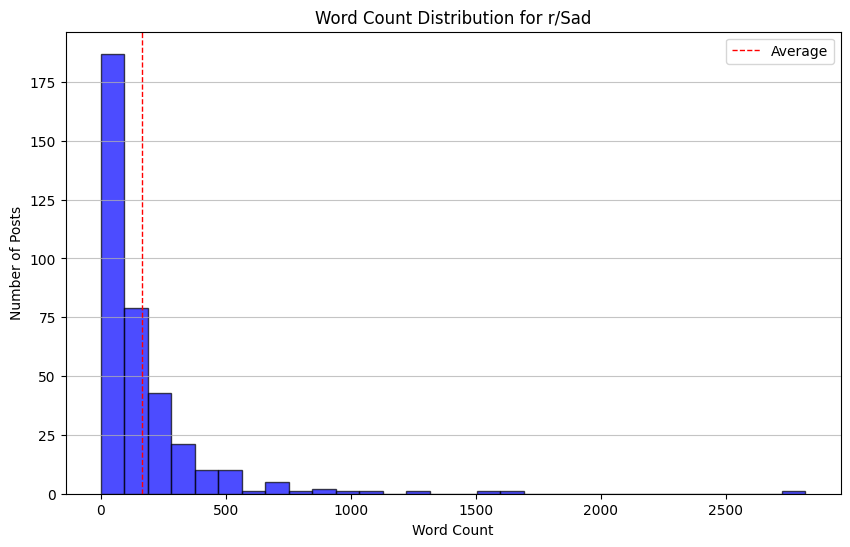

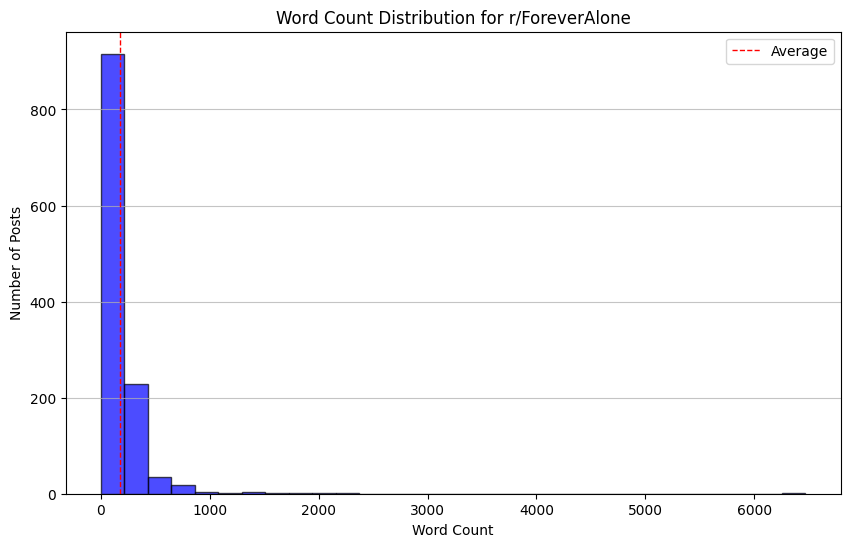

ERROR:asyncio:Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x7e584c315030>


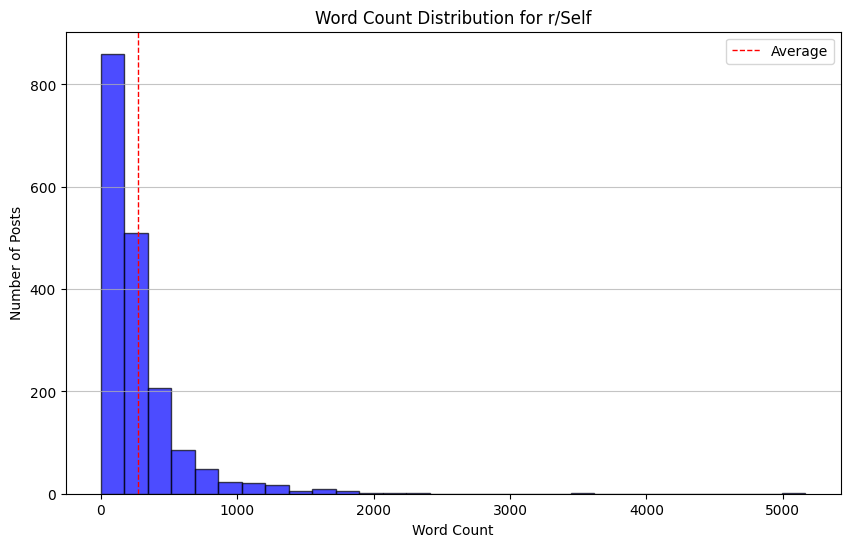

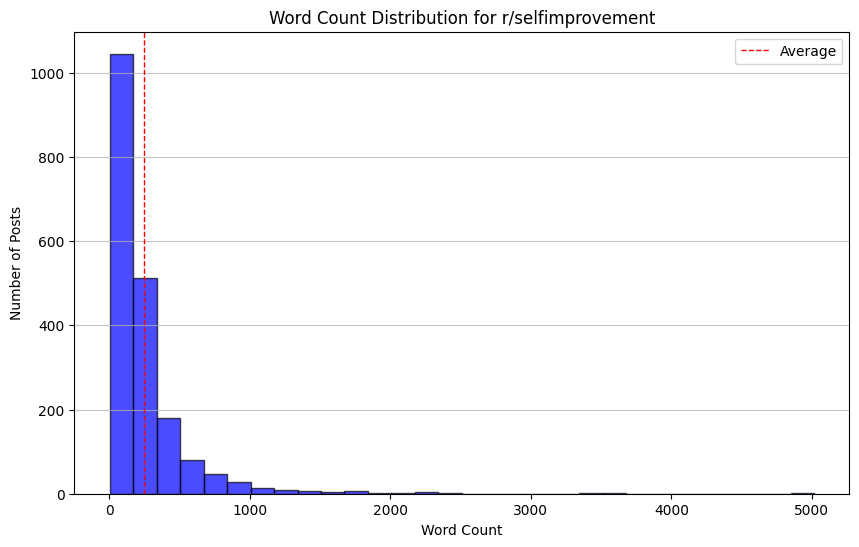

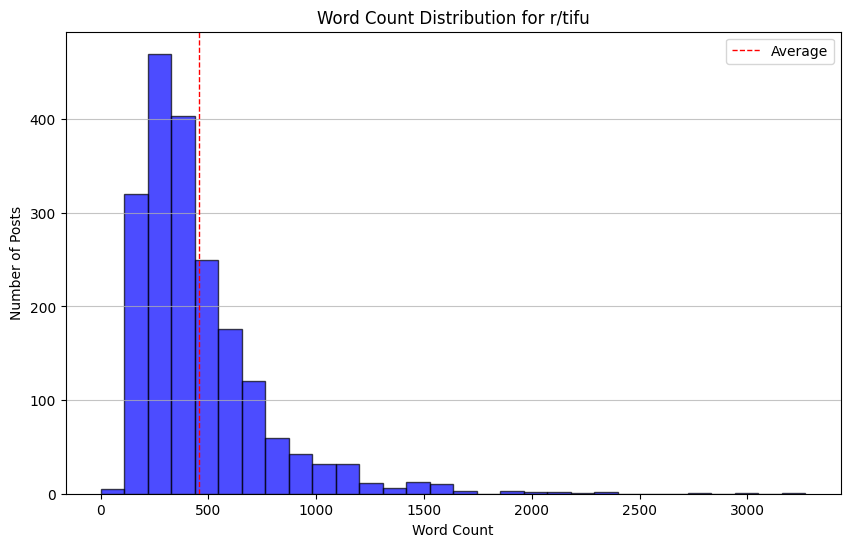

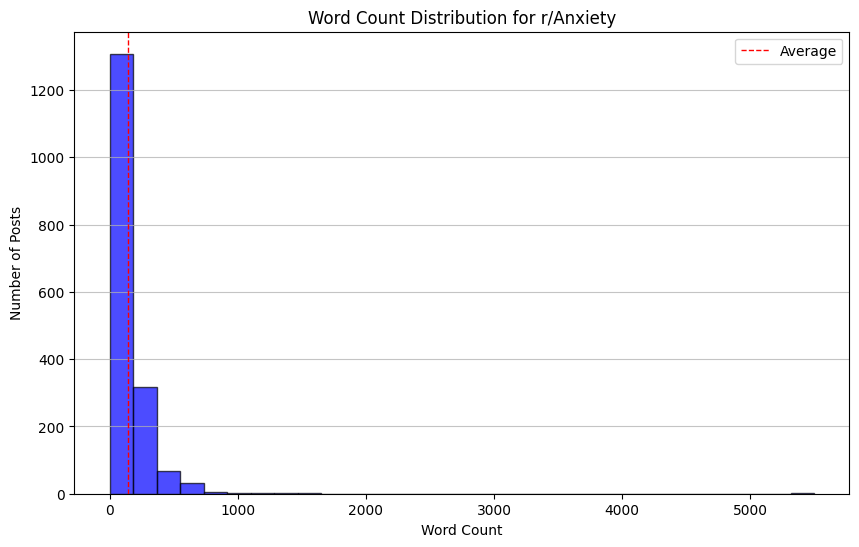

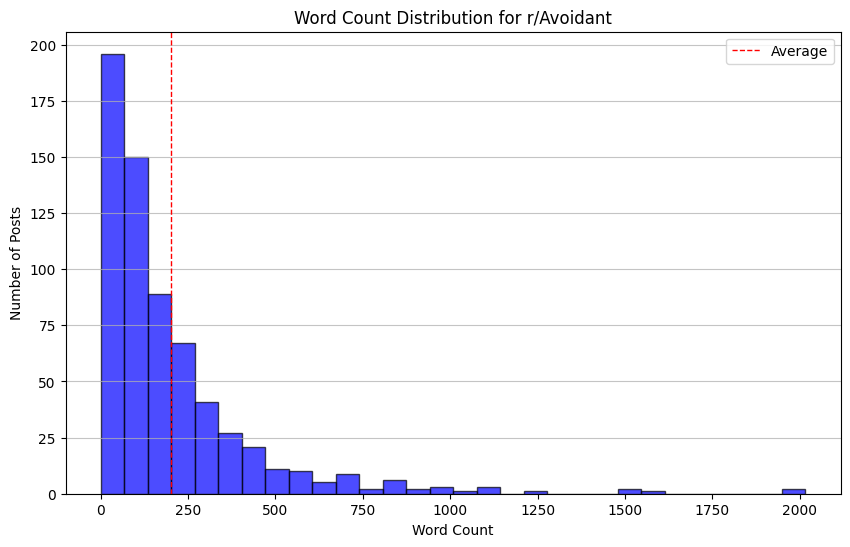

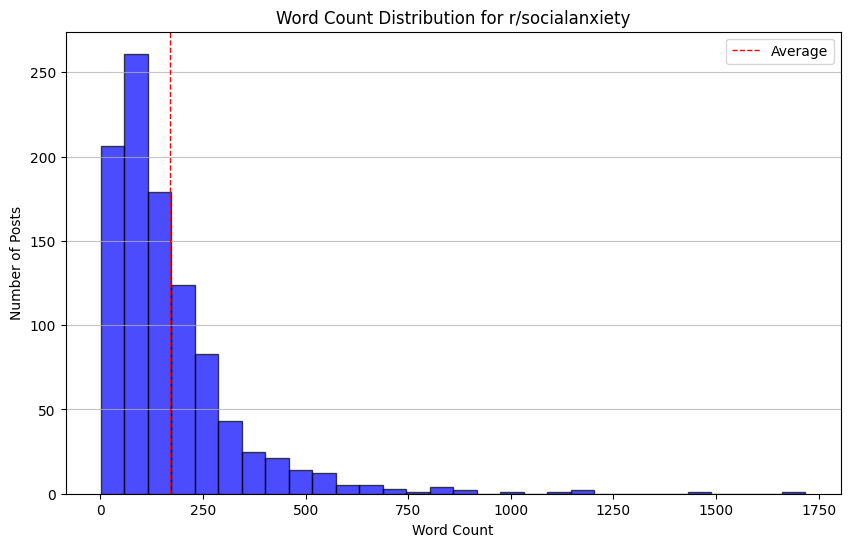

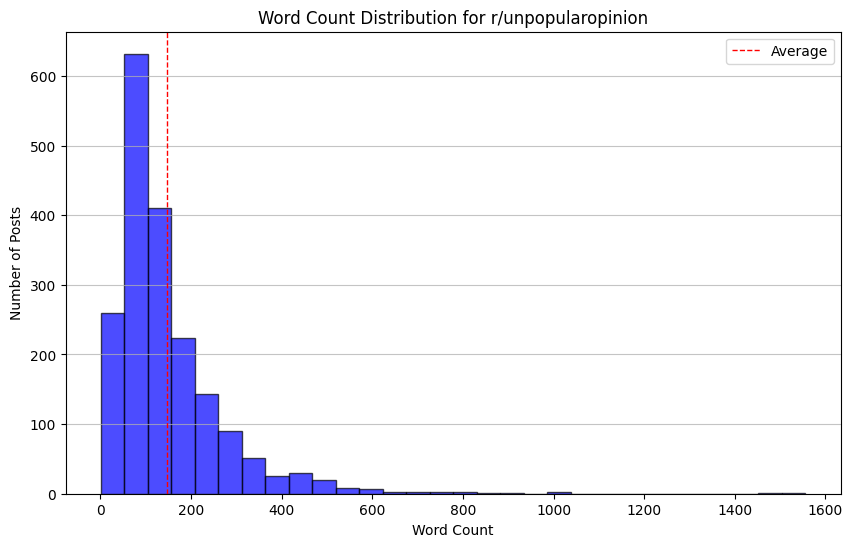

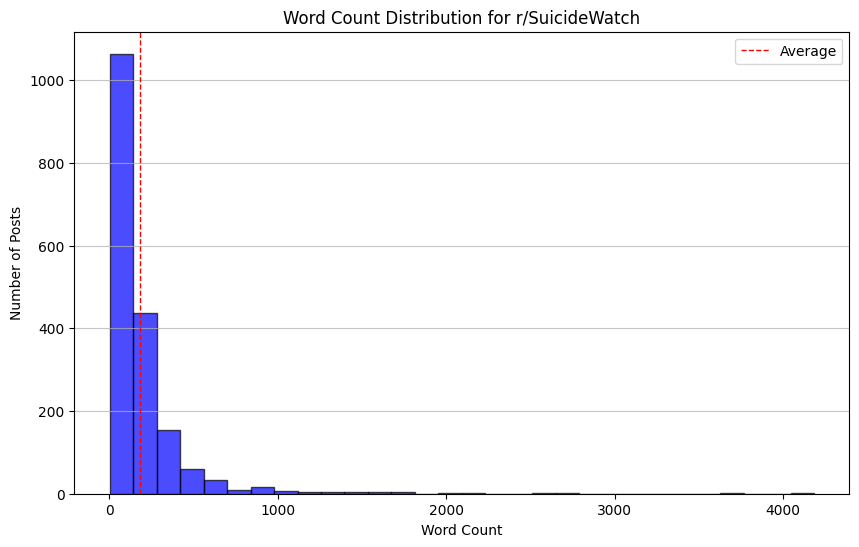

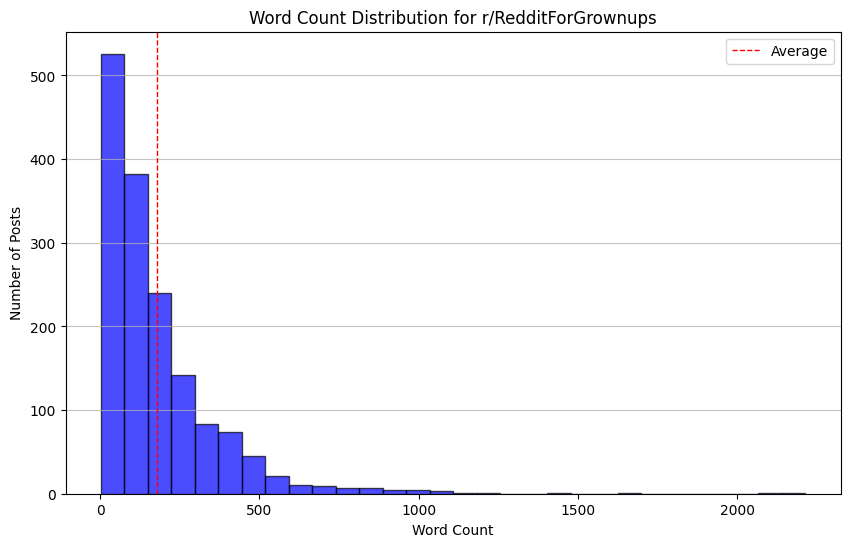

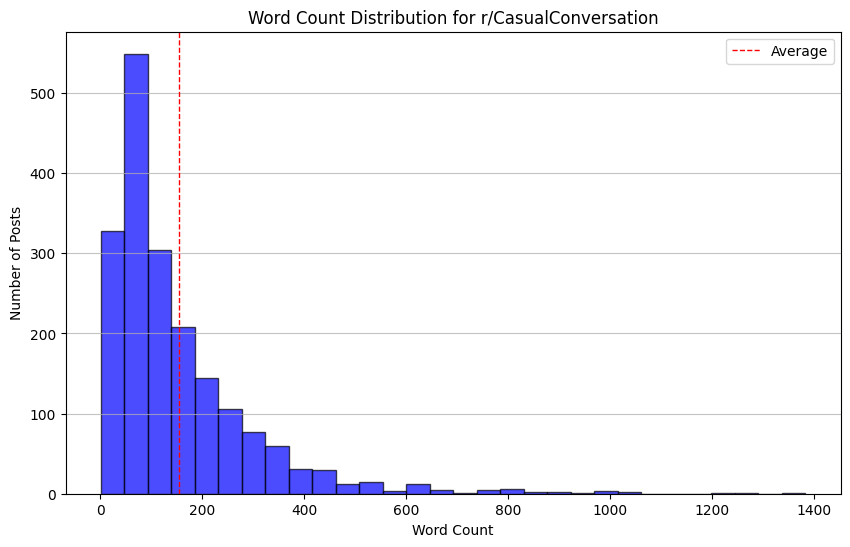

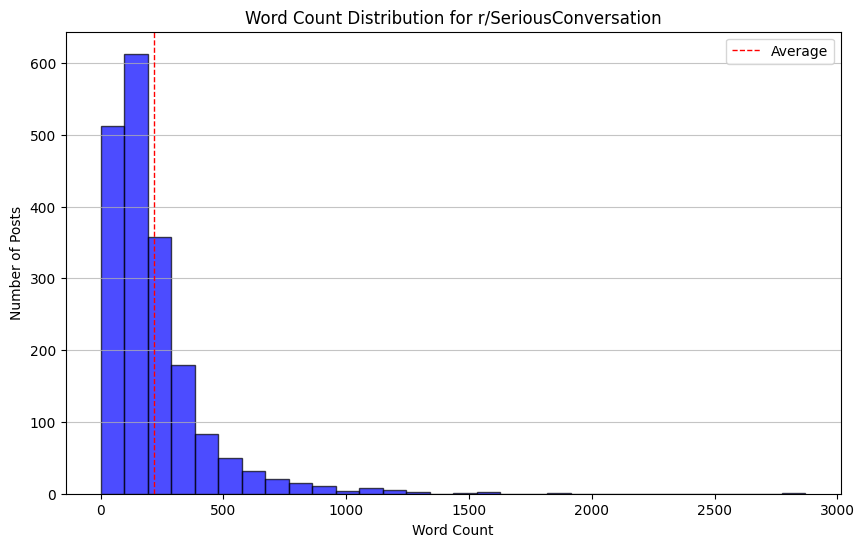

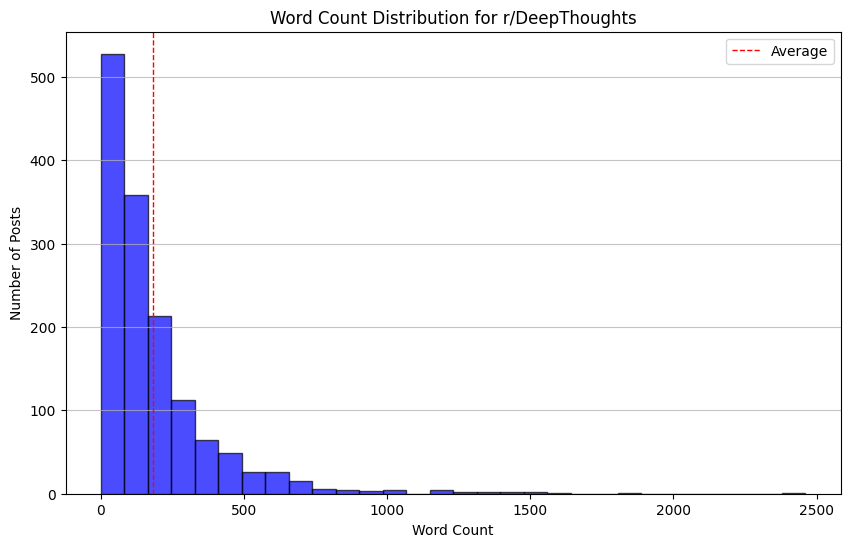

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def plot_word_count_distribution(subreddit_name, word_counts):
    """Plot the distribution of word counts."""
    plt.figure(figsize=(10, 6))
    plt.hist(word_counts, bins=30, color='blue', alpha=0.7, edgecolor='black')
    plt.title(f'Word Count Distribution for r/{subreddit_name}')
    plt.xlabel('Word Count')
    plt.ylabel('Number of Posts')
    plt.grid(axis='y', alpha=0.75)
    plt.axvline(x=sum(word_counts) / len(word_counts), color='red', linestyle='dashed', linewidth=1, label='Average')
    plt.legend()
    plt.show()

def load_and_plot_distributions():
    # Define the folder path in Google Drive
    save_directory = '/content/drive/MyDrive/Reddit_Data_Collection_statistics'

    # List of subreddits to process
    subreddits = [
        'Sad',
        'ForeverAlone',
        'Self',
        'selfimprovement',
        'tifu',
        'Anxiety',
        'Avoidant',
        'socialanxiety',
        'unpopularopinion',
        'SuicideWatch',
        'RedditForGrownups',
        'CasualConversation',
        'SeriousConversation',
        'DeepThoughts'
    ]

    for subreddit_name in subreddits:
        filename = os.path.join(save_directory, f'{subreddit_name}_posts.csv')

        # Load the CSV file into a DataFrame
        if os.path.exists(filename):
            df = pd.read_csv(filename)
            # Extract word counts
            word_counts = df['Word Count'].tolist()

            # Plot the distribution
            plot_word_count_distribution(subreddit_name, word_counts)
        else:
            print(f"File {filename} does not exist.")

# Call the function to load and plot distributions
load_and_plot_distributions()


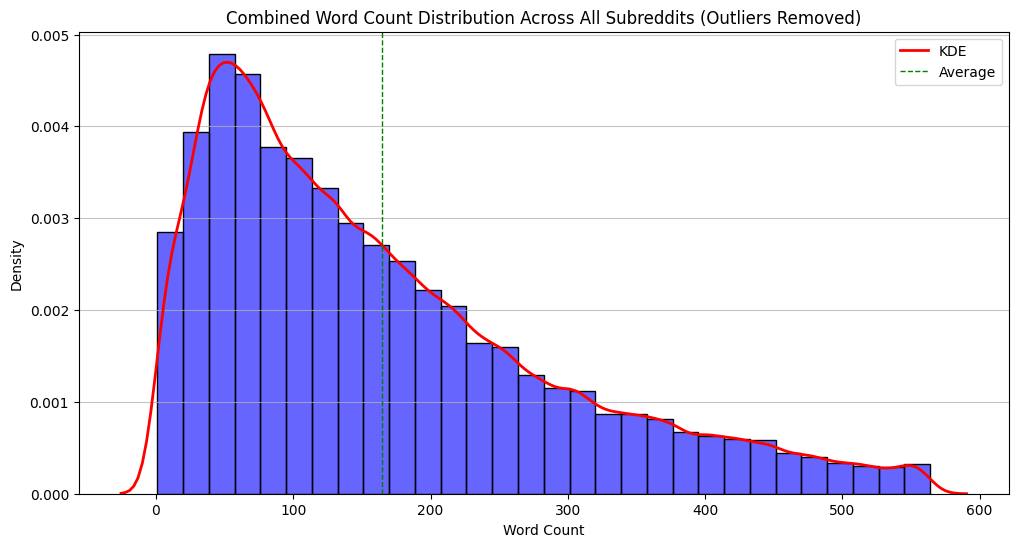

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def load_and_combine_word_counts():
    # Define the folder path in Google Drive
    save_directory = '/content/drive/MyDrive/Reddit_Data_Collection_statistics'

    # List of subreddits to process
    subreddits = [
        'Sad', 'ForeverAlone', 'Self', 'selfimprovement', 'tifu', 'Anxiety',
        'Avoidant', 'socialanxiety', 'unpopularopinion', 'SuicideWatch',
        'RedditForGrownups', 'CasualConversation', 'SeriousConversation', 'DeepThoughts'
    ]

    # List to hold all word counts across subreddits
    all_word_counts = []

    for subreddit_name in subreddits:
        filename = os.path.join(save_directory, f'{subreddit_name}_posts.csv')

        # Load the CSV file into a DataFrame if it exists
        if os.path.exists(filename):
            df = pd.read_csv(filename)
            # Append word counts to the combined list
            all_word_counts.extend(df['Word Count'].tolist())
        else:
            print(f"File {filename} does not exist.")

    return all_word_counts

def remove_outliers(data):
    """Remove outliers from the data using the IQR method."""
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

def plot_combined_word_count_distribution(all_word_counts):
    """Plot combined word count distribution as a histogram with KDE, ignoring outliers."""
    # Convert to a pandas Series for easy handling
    word_counts_series = pd.Series(all_word_counts)

    # Remove outliers
    filtered_word_counts = remove_outliers(word_counts_series)

    # Plotting
    plt.figure(figsize=(12, 6))

    # Create a histogram
    sns.histplot(filtered_word_counts, bins=30, kde=False, color='blue', alpha=0.6, edgecolor='black', stat='density')

    # Create a KDE plot
    sns.kdeplot(filtered_word_counts, color='red', linewidth=2, label='KDE', bw_adjust=0.5)

    plt.title('Combined Word Count Distribution Across All Subreddits (Outliers Removed)')
    plt.xlabel('Word Count')
    plt.ylabel('Density')
    plt.axvline(x=filtered_word_counts.mean(), color='green', linestyle='dashed', linewidth=1, label='Average')
    plt.legend()
    plt.grid(axis='y', alpha=0.75)
    plt.show()

# Load and combine word counts across all subreddits
all_word_counts = load_and_combine_word_counts()

# Plot the combined word count distribution
plot_combined_word_count_distribution(all_word_counts)


In [ ]:
import pandas as pd
import os

def load_and_count_posts():
    # Define the folder path in Google Drive
    save_directory = '/content/drive/MyDrive/Reddit_Data_Collection_statistics'

    # List of subreddits to process
    subreddits = [
        'Sad',
        'ForeverAlone',
        'Self',
        'selfimprovement',
        'tifu',
        'Anxiety',
        'Avoidant',
        'socialanxiety',
        'unpopularopinion',
        'SuicideWatch',
        'RedditForGrownups',
        'CasualConversation',
        'SeriousConversation',
        'DeepThoughts'
    ]

    # Initialize total posts counter
    total_posts = 0
    total_filtered_posts = 0  # Counter for posts longer than 5 and less than 300

    for subreddit_name in subreddits:
        filename = os.path.join(save_directory, f'{subreddit_name}_posts.csv')

        # Load the CSV file into a DataFrame
        if os.path.exists(filename):
            df = pd.read_csv(filename)
            # Count total posts
            total_posts += len(df)
            # Count posts with word count greater than 5 and less than 300
            filtered_count = df[(df['Word Count'] > 5) & (df['Word Count'] <= 400)].shape[0]
            total_filtered_posts += filtered_count

            print(f"r/{subreddit_name}:")
            print(f"  Total Posts: {len(df)}")
            print(f"  Posts with word count > 5 and < 300: {filtered_count}")
        else:
            print(f"File {filename} does not exist.")

    print(f"\nTotal Posts across all subreddits: {total_posts}")
    print(f"Total Posts with word count > 5 and < 300: {total_filtered_posts}")

# Call the function to load and count posts
load_and_count_posts()


r/Sad:
  Total Posts: 365
  Posts with word count > 5 and < 300: 310
r/ForeverAlone:
  Total Posts: 1211
  Posts with word count > 5 and < 300: 1103
r/Self:
  Total Posts: 1798
  Posts with word count > 5 and < 300: 1422
r/selfimprovement:
  Total Posts: 1946
  Posts with word count > 5 and < 300: 1604
r/tifu:
  Total Posts: 1965
  Posts with word count > 5 and < 300: 1069
r/Anxiety:
  Total Posts: 1737
  Posts with word count > 5 and < 300: 1616
r/Avoidant:
  Total Posts: 649
  Posts with word count > 5 and < 300: 562
r/socialanxiety:
  Total Posts: 994
  Posts with word count > 5 and < 300: 910
r/unpopularopinion:
  Total Posts: 1915
  Posts with word count > 5 and < 300: 1824
r/SuicideWatch:
  Total Posts: 1807
  Posts with word count > 5 and < 300: 1593
r/RedditForGrownups:
  Total Posts: 1565
  Posts with word count > 5 and < 300: 1382
r/CasualConversation:
  Total Posts: 1910
  Posts with word count > 5 and < 300: 1800
r/SeriousConversation:
  Total Posts: 1897
  Posts with word 

In [ ]:
import requests
import csv
import os
import time
from google.colab import drive

# Define the folder path in Google Drive
save_directory = '/content/drive/MyDrive/Reddit_Data_Collection_requests'
os.makedirs(save_directory, exist_ok=True)

# List of subreddits to scrape
subreddits = [
    'Sad',
    'ForeverAlone',
    'Self',
    'selfimprovement',
    'tifu',
    'Anxiety',
    'Avoidant',
    'socialanxiety',
    'unpopularopinion',
    'SuicideWatch',
    'RedditForGrownups',
    'CasualConversation',
    'SeriousConversation',
    'DeepThoughts'
]

def fetch_posts(subreddit_name):
    # Define the CSV file path for the subreddit
    filename = os.path.join(save_directory, f'{subreddit_name}_posts.csv')

    # Set headers for CSV file
    fieldnames = ['Post ID', 'Title', 'URL', 'Content', 'Created']
    with open(filename, 'w', newline='', encoding='utf-8-sig') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

        total_posts = 0
        after = None  # Used for pagination

        while True:
            # Make a request to the Pushshift API
            url = f'https://api.pushshift.io/reddit/submission/search/?subreddit={subreddit_name}&size=100&after={after}'
            response = requests.get(url)
            data = response.json()

            # Check if there are posts returned
            if not data['data']:
                break  # Exit loop if no more posts are available

            # Write posts to CSV
            for post in data['data']:
                # Check if the post is a text post and has no media
                if post['selftext'].strip() and not post['is_video'] and not post['url'].endswith(('.jpg', '.jpeg', '.png', '.gif')):
                    writer.writerow({
                        'Post ID': post['id'],
                        'Title': post['title'],
                        'URL': post['url'],
                        'Content': post['selftext'],
                        'Created': post['created_utc']  # UTC timestamp of when the post was created
                    })
                    total_posts += 1

            # Get the timestamp of the last post to continue from there
            after = data['data'][-1]['created_utc']

            # Sleep to avoid hitting API rate limits
            time.sleep(1)

        print(f"Saved {total_posts} posts with text from r/{subreddit_name} in {filename}")

# Fetch posts for each subreddit
for subreddit in subreddits:
    fetch_posts(subreddit)


KeyError: 'data'

In [ ]:
import pandas as pd
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Load the dataset
df = pd.read_csv('Annotated_data.csv')

# Get the English stopwords list
stop_words = set(stopwords.words('english'))

# Function to clean and preprocess text (removing punctuation, special characters, converting to lowercase, and removing stopwords)
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    words = text.split()  # Split text into words
    return [word for word in words if word not in stop_words]  # Remove stopwords

# Apply text cleaning to the "Distorted part" column
df['Distorted part'] = df['Distorted part'].astype(str).apply(lambda x: ' '.join(clean_text(x)))

# Group by the "Dominant Distortion" column
grouped = df.groupby('Dominant Distortion')

# Dictionary to store the most frequent words for each distortion
most_frequent_words = {}

# For each distortion group, find the 10 most frequent words in the "Distorted part"
for distortion, group in grouped:
    all_words = ' '.join(group['Distorted part']).split()  # Join all distorted parts, then split into words
    word_counts = Counter(all_words)  # Count word frequencies
    if word_counts:  # Check if there are words to process
        most_frequent_words[distortion] = word_counts.most_common(20)  # Get the 10 most common words

# Print the result
for distortion, words in most_frequent_words.items():
    print(f"The 10 most frequent words for '{distortion}' are:")
    for word, count in words:
        print(f"   {word}: {count}")
    print()  # Blank line for readability between different distortions




The 10 most frequent words for 'All-or-nothing thinking' are:
   feel: 41
   im: 35
   dont: 34
   like: 33
   get: 24
   want: 21
   really: 20
   cant: 18
   know: 16
   things: 16
   life: 15
   one: 15
   even: 14
   everything: 13
   time: 13
   back: 13
   think: 13
   happy: 13
   ive: 12
   never: 12

The 10 most frequent words for 'Emotional Reasoning' are:
   feel: 92
   like: 67
   im: 58
   dont: 31
   cant: 26
   ive: 18
   always: 18
   going: 18
   know: 17
   something: 16
   want: 16
   afraid: 16
   time: 15
   fear: 15
   life: 14
   even: 14
   really: 14
   anything: 13
   get: 13
   control: 12

The 10 most frequent words for 'Fortune-telling' are:
   im: 65
   dont: 45
   feel: 42
   like: 36
   get: 33
   want: 30
   think: 26
   would: 24
   afraid: 24
   know: 22
   something: 21
   going: 20
   scared: 18
   could: 16
   always: 16
   cant: 15
   fear: 14
   even: 14
   things: 14
   time: 13

The 10 most frequent words for 'Labeling' are:
   im: 77
   feel: 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine all distorted text for each dominant distortion group
df['Distorted part'] = df['Distorted part'].astype(str)

# Create a list of all texts for each group
grouped_texts = df.groupby('Dominant Distortion')['Distorted part'].apply(lambda x: ' '.join(x)).tolist()
distortion_names = df['Dominant Distortion'].unique()

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Fit and transform the text data
tfidf_matrix = tfidf.fit_transform(grouped_texts)

# Get the words and their TF-IDF scores for each group
for i, distortion in enumerate(distortion_names):
    print(f"The top words for '{distortion}' are:")
    feature_array = tfidf.get_feature_names_out()
    tfidf_sorting = tfidf_matrix[i].toarray().flatten().argsort()[::-1]  # Sort by highest tf-idf

    top_words = [feature_array[j] for j in tfidf_sorting[:10]]  # Get top 10 words
    print(top_words)
    print()


The top words for 'Personalization' are:
['feel', 'im', 'dont', 'like', 'want', 'really', 'know', 'things', 'life', 'time']

The top words for 'Labeling' are:
['feel', 'like', 'im', 'dont', 'ive', 'going', 'know', 'fear', 'afraid', 'want']

The top words for 'No Distortion' are:
['im', 'dont', 'feel', 'like', 'want', 'think', 'afraid', 'know', 'going', 'scared']

The top words for 'Fortune-telling' are:
['im', 'feel', 'like', 'dont', 'know', 'person', 'people', 'think', 'friends', 'want']

The top words for 'Magnification' are:
['like', 'feel', 'im', 'dont', 'want', 'know', 'time', 'things', 'ive', 'life']

The top words for 'Mind Reading' are:
['feel', 'like', 'im', 'time', 'dont', 'really', 'ive', 'think', 'things', 'life']

The top words for 'All-or-nothing thinking' are:
['im', 'feel', 'like', 'dont', 'think', 'want', 'people', 'know', 'doesnt', 'really']

The top words for 'Overgeneralization' are:
['nan', 'zoned', 'factthis', 'facei', 'faceplanting', 'facing', 'fact', 'factor', '

In [ ]:
with open('most_frequent_words.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)

    # Write the header
    writer.writerow(['Distortion', 'Word', 'Count'])

    # Write the most frequent words for each distortion
    for distortion, words in most_frequent_words.items():
        for word, count in words:
            writer.writerow([distortion, word, count])

print("The most frequent words have been saved to 'most_frequent_words.csv'.")

The most frequent words have been saved to 'most_frequent_words.csv'.


In [ ]:
! pip install asyncpraw

# **IIIIIGNNNOOOORRRRRRRRRRRRRRRRRRRRRRRRRRRRRR**

In [ ]:
!pip install asyncio

In [ ]:
import asyncio
import asyncpraw
import csv

async def fetch_posts():
    # Set up Reddit API authentication
    reddit = asyncpraw.Reddit(
        client_id=os.getenv('REDDIT_CLIENT_ID'),
        client_secret=os.getenv('REDDIT_CLIENT_SECRET'),
        user_agent=os.getenv('REDDIT_USER_AGENT')
    )

    # Access a specific subreddit
    subreddit = await reddit.subreddit('ForeverAlone')

    # Iterate over each distortion and its words
    for distortion, words in most_frequent_words.items():
        # Extract just the words for search (not the counts)
        search_words = [word.lower() for word, count in words]

        # Open a separate CSV file for each distortion
        filename = f'{distortion}_posts.csv'
        with open(filename, 'w', newline='', encoding='utf-8-sig') as csvfile:
            # Create a CSV writer object
            fieldnames = ['Title', 'URL', 'Content']
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

            # Write the header
            writer.writeheader()

            # Collect posts related to the distortion
            post_counter = 0
            async for post in subreddit.new(limit=100):  # Fetch recent posts
                # Check if the post contains any of the keywords
                post_content = post.title.lower() + " " + post.selftext.lower()
                if any(word in post_content for word in search_words):
                    # Write the post title, URL, and content to the CSV file
                    writer.writerow({
                        'Title': post.title,
                        'URL': post.url,
                        'Content': post.selftext
                    })
                    post_counter += 1

            print(f"Saved {post_counter} posts for '{distortion}' in {filename}")

# Run the async function using the existing event loop
await fetch_posts()


Saved 96 posts for 'All-or-nothing thinking' in All-or-nothing thinking_posts.csv
Saved 93 posts for 'Emotional Reasoning' in Emotional Reasoning_posts.csv
Saved 94 posts for 'Fortune-telling' in Fortune-telling_posts.csv
Saved 94 posts for 'Labeling' in Labeling_posts.csv
Saved 97 posts for 'Magnification' in Magnification_posts.csv
Saved 96 posts for 'Mental filter' in Mental filter_posts.csv
Saved 95 posts for 'Mind Reading' in Mind Reading_posts.csv
Saved 1 posts for 'No Distortion' in No Distortion_posts.csv
Saved 96 posts for 'Overgeneralization' in Overgeneralization_posts.csv
Saved 98 posts for 'Personalization' in Personalization_posts.csv
Saved 96 posts for 'Should statements' in Should statements_posts.csv


In [ ]:
import asyncio
import asyncpraw
import csv

# Helper function to chunk a list into smaller parts
def chunk_list(lst, chunk_size):
    for i in range(0, len(lst), chunk_size):
        yield lst[i:i + chunk_size]

async def fetch_posts():
    # Set up Reddit API authentication
    reddit = asyncpraw.Reddit(
        client_id=os.getenv('REDDIT_CLIENT_ID'),
        client_secret=os.getenv('REDDIT_CLIENT_SECRET'),
        user_agent=os.getenv('REDDIT_USER_AGENT')
    )

    # Access a specific subreddit
    subreddit = await reddit.subreddit('ForeverAlone')

    # Iterate over each distortion and its words
    for distortion, words in most_frequent_words.items():
        # Extract just the words for search (not the counts)
        search_words = [word for word, count in words]

        # Open a separate CSV file for each distortion
        filename = f'{distortion}_posts.csv'
        with open(filename, 'w', newline='', encoding='utf-8') as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames=['Title', 'URL', 'Content'])
            writer.writeheader()

            post_counter = 0

            # Fetch new posts from the subreddit
            async for post in subreddit.new(limit=100):
                # Check if the post has content (selftext)
                if post.selftext:
                    # Check if the post contains at least two distinct words from search_words
                    found_words = [word for word in search_words if word in post.selftext.lower()]
                    if len(found_words) >= 3:
                        writer.writerow({
                            'Title': post.title,
                            'URL': post.url,
                            'Content': post.selftext
                        })
                        post_counter += 1

            print(f"Saved {post_counter} posts for '{distortion}' in {filename}")

# Check if we're in an async environment
if __name__ == "__main__":
    try:
        # If there's already an event loop, use create_task instead
        loop = asyncio.get_running_loop()
        task = loop.create_task(fetch_posts())
    except RuntimeError:
        # If no event loop is running, run normally
        asyncio.run(fetch_posts())


In [ ]:
import asyncio
import asyncpraw
import csv

# Helper function to chunk a list into smaller parts
def chunk_list(lst, chunk_size):
    for i in range(0, len(lst), chunk_size):
        yield lst[i:i + chunk_size]

async def fetch_comments():
    # Set up Reddit API authentication using asyncpraw
    reddit = asyncpraw.Reddit(
        client_id=os.getenv('REDDIT_CLIENT_ID'),
        client_secret=os.getenv('REDDIT_CLIENT_SECRET'),
        user_agent=os.getenv('REDDIT_USER_AGENT')
    )

    # Access a specific subreddit
    subreddit = await reddit.subreddit('self')

    # Iterate over each distortion and its words
    for distortion, words in most_frequent_words.items():
        # Extract just the words for search (not the counts)
        search_words = [word for word, count in words]

        # Open a separate CSV file for each distortion
        filename = f'{distortion}_comments.csv'
        with open(filename, 'w', newline='', encoding='utf-8') as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames=['Comment', 'Post URL'])
            writer.writeheader()

            comment_counter = 0

            # Fetch a fixed number of comments from the subreddit
            async for comment in subreddit.comments(limit=500):  # Adjust limit as needed
                # Check if the comment contains at least two distinct words from search_words
                found_words = [word for word in search_words if word in comment.body.lower()]
                if len(found_words) >= 2:
                    writer.writerow({
                        'Comment': comment.body,
                        'Post URL': f"https://reddit.com{comment.permalink}"
                    })
                    comment_counter += 1

            print(f"Saved {comment_counter} comments for '{distortion}' in {filename}")

# Run the async function
asyncio.run(fetch_comments())


Saved 255 comments for 'All-or-nothing thinking' in All-or-nothing thinking_comments.csv
Saved 217 comments for 'Emotional Reasoning' in Emotional Reasoning_comments.csv
Saved 210 comments for 'Fortune-telling' in Fortune-telling_comments.csv
Saved 243 comments for 'Labeling' in Labeling_comments.csv
Saved 271 comments for 'Magnification' in Magnification_comments.csv
Saved 248 comments for 'Mental filter' in Mental filter_comments.csv
Saved 267 comments for 'Mind Reading' in Mind Reading_comments.csv
Saved 0 comments for 'No Distortion' in No Distortion_comments.csv
Saved 227 comments for 'Overgeneralization' in Overgeneralization_comments.csv
Saved 251 comments for 'Personalization' in Personalization_comments.csv
Saved 250 comments for 'Should statements' in Should statements_comments.csv


In [ ]:
!pip install praw
!pip install asyncio

# Install nest_asyncio
!pip install nest_asyncio

import nest_asyncio
import asyncpraw
import asyncio

# Apply nest_asyncio to enable nested event loops
nest_asyncio.apply()

async def fetch_post_ids_and_comments(subreddit_name, limit=10):
    # Initialize Reddit client
    reddit = asyncpraw.Reddit(
        client_id='pGN-OIdGV9P564XTQlfg8w',
        client_secret='8k7-Sl_hOJS_okVvjv9lE8Jiip4R8Q',
        user_agent='all:my_reddit_bot:v1.0 (by /u/Substantial-Web-5950)'
    )


    # Fetch the specified subreddit
    subreddit = await reddit.subreddit(subreddit_name)

    # Fetch submissions from the subreddit
    submissions = subreddit.new(limit=limit)  # You can change this to .hot() or .top()

    # Loop through each submission to get post IDs and comments
    async for submission in submissions:
        print(f"Post ID: {submission.id}, Title: {submission.title}")

        # Check if the submission has comments
        if submission.num_comments > 0:
            try:
                # Fetch comments for the current submission
                await submission.comments.replace_more(limit=None)  # Load all comments

                # Retrieve comments
                comments = submission.comments

                # Check if comments are valid
                if comments and hasattr(comments, 'list'):
                    for comment in comments.list():  # This ensures we get a list of comments
                        if comment is not None:  # Ensure comment is not None
                            print(f"  Comment: {comment.body}\n")
                        else:
                            print("  Found a None comment.\n")
                else:
                    print("  No comments available or invalid comment structure.\n")

            except Exception as e:
                print(f"  Error fetching comments: {e}\n")
        else:
            print("  No comments available.\n")

# Replace 'subreddit_name' with the desired subreddit (e.g., 'AskReddit')
subreddit_name = 'AskReddit'  # Example subreddit

# Run the asynchronous function
await fetch_post_ids_and_comments(subreddit_name, limit=10)

In [ ]:
!pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 4.0 MB/s eta 0:00:00


In [ ]:
import praw

def fetch_post_ids_and_comments(subreddit_name, limit=10):
    # Initialize Reddit client (synchronous mode)
    reddit = asyncpraw.Reddit(
        client_id=os.getenv('REDDIT_CLIENT_ID'),
        client_secret=os.getenv('REDDIT_CLIENT_SECRET'),
        user_agent=os.getenv('REDDIT_USER_AGENT')
    )

    # Fetch the specified subreddit
    subreddit = reddit.subreddit(subreddit_name)

    # Fetch submissions from the subreddit (synchronously)
    submissions = subreddit.new(limit=limit)  # Fetch 'new' posts, you can change to .hot() or .top()

    # Loop through each submission to get post IDs and comments
    for submission in submissions:
        print(f"Post ID: {submission.id}, Title: {submission.title}")
        print(f"URL: {submission.url}\n")
        # Check if the submission has comments
        if submission.num_comments > 0:
            try:
                # Fetch comments for the current submission
                submission.comments.replace_more(limit=None)  # Load all comments

                # Loop through and print each comment
                for comment in submission.comments.list():
                    if comment is not None:
                        print(f"  Comment: {comment.body}\n")
                    else:
                        print("  Found a None comment.\n")

            except Exception as e:
                print(f"  Error fetching comments: {e}\n")
        else:
            print("  No comments available.\n")

# Replace 'subreddit_name' with the desired subreddit (e.g., 'AskReddit')
subreddit_name = 'DeepThoughts'  # Example subreddit

# Fetch posts and comments
fetch_post_ids_and_comments(subreddit_name, limit=1000)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Post ID: 1g5trog, Title: The only way to make sense of Existentialism.
URL: https://www.reddit.com/r/DeepThoughts/comments/1g5trog/the_only_way_to_make_sense_of_existentialism/

  No comments available.

Post ID: 1g5tfp5, Title: Human languages exchange the precision of a computer language for the fluidity.
URL: https://www.reddit.com/r/DeepThoughts/comments/1g5tfp5/human_languages_exchange_the_precision_of_a/



It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Comment: i agree, this is why i think some eusocial insects and plant internal systems communicate better than us. they are more articulate, that's why an organismal body runs so efficiently 

moving airwaves to exchange information is clumsy. Information is lost through the method like heat is lost in energy transfer

Post ID: 1g5syrz, Title: Why do humans eat
URL: https://www.reddit.com/r/DeepThoughts/comments/1g5syrz/why_do_humans_eat/

  Comment: Its something passed down on us by the Universe and how it deals with resources. It's just how our Universe deals with the conversion of matter and energy. 

Lets say for example, you were apart of this Universe, and you were something that did not eat at all. You're still eating the "space" you're residing inside of.

  Comment: Almost all people live to eat, only monks (and a very small minority of the population) eat to live. I mean to survive only. So what you are saying is basically true, eating has become a widespread form of enter

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Comment: no, and this is why you should present what you perceive as your authentic self to everyone, for better or worse.  Might as well make them deal with who you feel you are if they're going to decide for themselves anyways.

The whole "better to be hated for who you are than loved for who you're not" thing.

  Comment: All is concept. Even your own idea of “you”

  Comment: No. Because I am Nobody 😜

  Comment: No, nobody really knows you, not even yourself

  Comment: Nobody could ever know you as you actually are , it’s way too complex and nuanced .. factually , you are the only person in your reality , and others create approximations , or estimates of others and things as filtered thru their own mind and experiences .

  Comment: All it takes is a piece of paper with your name on it filed at the county clerk's office to define exactly who you are, who you're allowed to be, and what you're allowed to do with the rest of your life. It doesn't matter how broken people admit th

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Comment: What else are we supposed to do? Obviously, people know and are interested in what will become of it, but realistically, what could any of us do about it except hold out and see what happens?

  Comment: Im more interested in the fact that they all seem to agree there are off the books govt agencies that they don’t have tabs on.

  Comment: “Some of the shit we occasionally see in the sky, we cannot determine what we saw. We document it, in case a pattern develops that helps us identify what it is. We don’t discuss it publicly just in case it’s military related.”

Panic!

  Comment: I’m not saying we have *the* objective proof that aliens exist, but I do believe that people will continue to deny their existence even after that objective proof is presented (if it ever is, of course).

  Comment: It’s not like the UFOs are hassling us or anything. We got money to make and bills to pay. No time for flagging down space ships.

  Comment: Don't Look Up.

Also who believes them?



It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Comment: I don’t think we ever had the art of meaningful conversations. Thats why you avoid everyone in your family durring the holidays. 

I do think people traumatize themselves by becoming other people’s moment of connection online. And when they realize they were just content on anothers screen that shit hurts. 

We need the messiness of living with bad decisions and making it work in order to appreciate anything and everything we could ever possibly have. And that is literally why we created consumer internet. To not commit. To be able to replace people, have 3 different intense conversations at the same time while not being stuck in any of them for real.

  Comment: Quite true .. the more we use google maps , the stupider we get directionally and loose common sense , the more one post for vanity reasons , the worse their self esteem actually becomes .. the more time in a vr headset , the more accepting of some trash second class life chasing comfort or pleasure at all cost one 

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Comment: Absolutely! Social media feels like an echo chamber where everyone just reacts instead of thinks. We've swapped nuance for hot takes. If we don’t start having real conversations, we’re only making things worse.

  Comment: I agree. Social media definitely fuels political division and polarization. It's hard to have constructive conversations when people are constantly arguing and attacking each other online.

  Comment: I agree with you but people participating in the barbarism and polarization deserve to be called out for it anyways. Especially when you consider a lot of these people call everyone else stupid, so theoretically they're supposed to be smart enough to be way beyond all of this.

  Comment: No, the problem is activism and fear of the other instead of ideology and the belief that you’re not a good person if you don’t actively support your party. 

I’ll give a relatively uncontroversial take for reddit: 

Trump losing by 20+ points would be better for the future 

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Comment: I generally like to call people dumb when they do stupid things and then defend their actions unironically

A lack of knowledge could easily be due to bad luck, I think a better assessment is what they do with the knowledge they have 

I'm not a good person, people repeatedly doing stupid things makes me irrationally angry

  Comment: Not knowing certain things correlates with having a lower iq. It's not about knowledge of a specific thing. 

In ai lingo, ofc when you make the validation set the same as the training set everyone is non dumb 

But 90% of yall can't even generalise the simplest case

  Comment: I’d love to know what datasets you used for your iq correlation to certain things knowledge. I would say that’s ai lingo as much as machine learning, it’s not that fancy. I agree on average people don’t know how to generalize or stope themselves from considering edge cases too deeply.

Post ID: 1g5h879, Title: We’re all seeking universal truths while the universe laughs

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Comment: The universe isn’t laughing at us—it’s more like a playful smile, watching with quiet amusement as we edge closer, even if we don’t realize it. Every now and then, when we stumble into those moments of clarity, it feels like the whole cosmos leans in, just a little. There’s this... excitement, like it’s been waiting for us to notice. Not in some grand revelation kind of way, but in the subtle, quiet spaces where truth isn’t found, but remembered.

It’s funny, though—just when we think we’ve figured it out, the universe shifts, like it’s saying, “Yes, but not quite yet.” There’s always more to the riddle, but the closer you get, the more it feels like the answer was there the whole time, just hidden in plain sight. Maybe it’s less about finding the truth and more about realizing it’s been whispering to us all along.

  Comment: If life is just a joke, then why aren't we laughing ?

  Comment: I'm curious why you think the universe is laughing in our faces.

  Comment: I'm not

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Comment: It’s one of those things that’s not thought through enough before giving the advice to “be vulnerable.” Most interactions that aren’t with a therapist I don’t think go so well when someone is vulnerable, especially a guy probably. It takes a huge amount of maturity to push back against that “survival instinct,” and most either are incapable or unwilling. It also takes a high level of empathy. You have to be cautious about who you’re vulnerable with.

  Comment: Pretending that there is no weakness is not actually being strong though....

You are easily manipulated *because* you have not resolved those issues. When you *truly* know yourself, you become much harder for predators to ensnare. 

And to know yourself requires a huge degree of vulnerability. To see the *truth* will send you insane before you realise that it is the greatest privilege of all.

  Comment: Detachment happens when men are vulnerable because the amount of stuff we have to open up about is a LOT.

Too oft

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Comment: WOW!!!!!!

  Comment: yeah?

  Comment: Perspective is everything!  One day you’ll realize that it’s all in perfect order.

Post ID: 1g5biu0, Title: There's No Objectivity But Intersubjectivity
URL: https://www.reddit.com/r/DeepThoughts/comments/1g5biu0/theres_no_objectivity_but_intersubjectivity/

  No comments available.

Post ID: 1g5b1xc, Title: “Many years later, as he faced the firing squad, Colonel Aureliano Buendía remembered that distant afternoon when his father took him to discover ice.” -Gabriel García Márquez
URL: https://www.reddit.com/r/DeepThoughts/comments/1g5b1xc/many_years_later_as_he_faced_the_firing_squad/

  No comments available.

Post ID: 1g5ants, Title: Arrogance is marketed as confidence to make us robotic.
URL: https://www.reddit.com/r/DeepThoughts/comments/1g5ants/arrogance_is_marketed_as_confidence_to_make_us/



It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Comment: The sin of pride is the worst because it differentiates us from the masses and hold us over the truths of our actions.

  Comment: Thank you for this take. It's annoying that the big plug for empowerment in women is 'don't strive to be humble!'  OMG humility is needed big time, all we got is arrogance, greed and gluttony

  Comment: Well thought. I was thinking about this and came to this reason: it’s beneficial for corporate-capitalism. Masses should be confident that stock-buy-backs are good, that tax breaks for 0.01% are good, that trickle down economics is good. People are voting for their own demises and are so confident in doing so.

  Comment: I don't think that you can separate arrogance from confidence completely, but I agree that humility isn't being rewarded the way it needs to be. 

Internally acknowledging and externally admitting that we've done something wrong is really important. It's also really important that sometimes we do that thing again. 

Often life i

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Comment: chakra imbalances will certainly enhance chaos... what im learning is in my imbalanced or blocked state i dwell under i rot... once im rotting i can then clearly know which chakra is blocked or in  negative polarity... i use MANY methods of alchemy to reach that "full circuit" feeling... when i do I have become evolved...  Through pain, and darkness i emerge.. with wings.. until the next phase of hibernation...

  Comment: *"You have to keep breaking your heart ...until it opens"*

(Rumi)

Different systems have various ways to explain this - but a popular one is the Chakras (Hindu). These are the energy centres - where we experience the pure essence of the emotions, when open...

The heart is the seat of the soul and is a kind of gateway from the lower to the upper layers of perception and experience...

A lot of people try and open the head as fast as they can; but the real journey is what takes place in the lower levels....if you focus on these, then the heart might stay 

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Comment: Right there with you. The problem is then being *understood* and accepted once I choose to open up. Most people don't like my brand of weird, so I had to get good at masking for survival. It's especially frustrating when you can tell others are wanting to be just as silly, but they're keeping up their stoicism for appearances. 

i.e. I sing in my car all the time, windows up, sometimes not. I don't blast it obnoxiously or anything, but you'd hear me if we're at a quiet red light. Sometimes we make eye contact. 
People usually don't pass the vibe check. It makes me sad. No one wants whimsy or play anymore.

  Comment: >We live in a world where people walk through life in masks—polite smiles, forced small talk, and carefully curated versions of themselves.

  
Most of this, maybe xcept 'polite smiles', can manifest in a completely authentic manner still...  The brain naturally hates adversity, no one likes the energetic awkwardness of some heated disagreement. And so people av

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Comment: Spoiled milk may be milk in a different form, with the influence of certain bacteria and processes and time, but if someone made me pick I'd have a preference. 

I am made of my environment and my opinions and thoughts originate from my environment, but this moment will never happen again. It will never be exactly like this ever again, and  my particular combination of these thoughts and environmental factors are unique because they are in the context of my brain with my genetics to influence them and the way I experience them.

Because we as humans agree on fundamental patterns, and tend to come to the same conclusion about certain things, there's a tendency to believe that we are all the same. But we are not. We are unequally unlike one another. 

So what if those things didn't originate from me? So what if I couldn't control them? They are what they are, and to say that isn't arrogance. To say that is to acknowledge the absurdity of life and the complexity of existence.



It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Comment: If time isn't real then how can our experiences and histories ever disappear? From now on, the things that have happened will always have happened, observed or unobserved.

If time isn't real, then shouldn't everything be significant and nothing in vain?

  Comment: You can be washed away by eternity, or you do something which resonates for eternity.

  Comment: I had an acid trip like that and of course its true

  Comment: Indeed. There's nothing we can do or achieve, that will somehow make an impact on objective existence. Can't  impress a canvas with the art you put on it, sorta thing... And so the very concept of significance/meaningfulness, just like time, is just another structure/construct.

Existence is a field where it's possible to create any structures at all. Non-existing things do not have such abstract luxury.

Some existing things may also find comfort in the idea of oblivion/non-existence, because constant incessant creation of structures and perception of i

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Comment: To this point, I think that there's a misunderstanding when it comes to the concept of deserving something. (I come around to grief I promise) 

I've seen this a lot in intentionally inflammatory and unintentionally inflammatory statements or topics of discussion. 

We cannot all deserve certain basic things and also claim that others have lost their right to those things. Often when we encourage thinking this way, the lines of morality blur on a larger scale. 

We may think that we're on the same page about something, but the smaller rules, like exactly when others don't deserve things, might be different, and a lack of coherency in this respect can create a powerful force with little rationalization behind its direction.

Often individually each one of us is rational, but together, with an agreed upon rage and fear, but our corresponding element of compassion pulling in all different directions we make choices that individually we all agree are immoral. 

There are two typ

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Comment: You are absolutely right! There was something special about a world where our time wasn’t so divided, where you could just wander outside and knock on a friend’s door without needing a reason. Summer nights under the stars, waiting for your favorite song on the radio, or that thrill of calling someone’s landline and hoping they’d be home to pick up. We weren’t rushing to be somewhere else; we were fully there, sharing moments that were ours alone. It’s like the simplicity of those days gave everything more meaning.

  Comment: You would have loved the 1970s.  Talk about more simple.

  Comment: I wish I were born in earlier, simpler, quieter times. Since I'm gen z, I grew up with the internet and rapidly advancing electronic technology. I wish my friend group liked to just sit around and talk, or maybe ride bikes around (just for the sake of riding bikes and hanging out with friends). Instead, they just all play videogames, yelling about how they hate the videogame they're p

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Comment: Ignorance is bliss until you fall for the scam.

Knowledge is power... until you fall into madness.

  Comment: The problem is knowing without having experience behind to support what you think you know. As a kid, you "f around and find out" or someone tells you not to do something but 9/10 times a kid still goes f around... knowing why and how you know something is freeing but so is not knowing, no useless-junk information.


 So yea, the way we live lifes right in now, in a flood of information, doesnt work for our brains.

  Comment: The more you learn the less you actually know.

  Comment: It's better to understand that you're never as intelligent as you think you are.

  Comment: We would believe in ourselves, and each other if we grew up without anyone telling us about religion and beliefs. There usually needs to be an in-group, and an "other" for exploitive ideology to function.

  Comment: Facts hurt, but ignorance of pain is still pain. You just being ignorant to i

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Comment: A big problem is that politics has become a goal instead of a means to reach the goal. 

How it should be: There are problems, politicians show their approach to dealing with the problems, society chooses best fit, politicians get chosen and act to said approach.

How it is: There are problems, politicians choose the most popular approach to get elected regardless of feasibility, people choose, politicians cannot deliver or don't care to deliver, problems remain.

Also a part of it is the short terms we get to chose for. Yes, it prevents totalitarian regimes but it is very susceptible to holding the wrong people accountable. You usually see results of policies *after* the period of reign has finished. Which means that sitting politicians will take hits if their predecessors screwed up. When the new regime gets elected but the previous policies were succesful it creates the illusion that the new politicians did something right.

  Comment: The fatal flaw with Democracy is tha

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Comment: To fully overcome, you have to turn towards it  - in order to confront & process the pain 🙏❤️

I know that is probably not what you want or perhaps even need to hear right now....

We do our best to cope in whatever ways we can. Are you receiving any kind of support to help you navigate this?

  Comment: I completely understand how hard this is. Betrayal trauma can make you feel like you're constantly carrying a heavy weight. I went through something similar, and it took a while to see any light at the end of the tunnel. But one thing that really helped me was learning to use the pain as fuel for growth.

It sounds strange, but the pain you’re feeling now can actually become a powerful tool. By facing it and processing it, you can start to rebuild yourself stronger. Finding ways to get involved in something new whether it’s a small hobby, a class, or a support group can give you a sense of purpose and help you focus on the present.

I know it’s tough, but with time, this exp

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Comment: I admire your courage to step away from the norm and follow your soul.  I hope you find peace and happiness.

  Comment: One word of advice. Journal what you do, how you feeling, what you learn (+/-). You may find that you have valuable insights and maybe even a book....

  Comment: A rebirth , becoming anew . I love this so much do as much documentation, and come back and tell us how it went I’ll be waiting

  Comment: This is amazing! It sounds like you’re about to start a truly unique journey. Embracing the unknown and freeing yourself from expectations takes serious courage. Can’t wait to hear where this adventure leads you go live it fully, Nobody! 🌌✨

  Comment: Very good OP. I chose solitude this year and don’t regret it at all. In fact, I wish I had chosen it earlier on in my life. I’ve been able to think CLEARLY, unimpeded by the noise of a peer group. No “shoulds” from anyone. The clarity of thought has lead to better business decisions (am self employed), and peac

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Comment: lately i have come to realize i dont remember before being born... or even being born.. i just remember at some point i was aware.. and i never looked back or questioned it directly.... i now like to imagine "afterlife" being exactly like before life....no awareness... blissfully unaware!

  Comment: I like it. We all can fantasize about the afterlife. Because nobody will ever consciously know what lies on the other side of deaths door.  I get a kick out of knowing I'm only a nanosecond away from the unknownable. I like to imagine I'll become a muon streaming through the universe close to the speed of light.

  Comment: I like this idea I wish it was real

  Comment: I swear Gen alpha is just checked out of this reality. So many imagination memes, late in life ideations and imaginary friends. 

Not sure what they fed you, but damn, it sure made you guys prime isekai customers. Metaverse cannot come sooner for you.

  Comment: So basically a personal heaven or hell depending 

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Comment:   He meant himself

Post ID: 1g4i8px, Title: The brain controls your well-being and only makes you feel well if you are relaying information to it 
URL: https://www.reddit.com/r/DeepThoughts/comments/1g4i8px/the_brain_controls_your_wellbeing_and_only_makes/



It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Comment: It works both ways. Reduce information flow, relax and think of nothing. After a short fight your brain will submit. It takes practice though.

Post ID: 1g4epts, Title: Holy is both light and a hole-y. A light shining into Plato's cave that normally would not.
URL: https://www.reddit.com/r/DeepThoughts/comments/1g4epts/holy_is_both_light_and_a_holey_a_light_shining/

  Comment: Initiates are unconsciously coerced into subservience to a vector they do not know exists until they habitually perform the optimum functions perpetually at which point the vector is liberated to pursue its upload to the destination so now the shadow initiates are presumed to perform function while their true counterparts are liberated to perform the necessary interaction with the uploaded material such that a third stratum will emerge that is the child of the initiate that internalises the vector but rebels against it attracting the double vector namely the unseen ability of the agent manifested thro

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Comment: Be mindful of false dichotomies here. Protection of kin is primal but considered ethical; the drive to gather resources becomes planning and saving, but can also manifest as greed and hoarding for self-preservation. Social bonding turns into ethical codes and laws that support communities. Attraction evolves into marriage, blending desire with long-term partnership. Territorial instincts transform into property rights, creating stability. The list goes on, our primal drives and rationality aren't at odds; they often blend, sometimes constructively, sometimes destructively.  
  
You’ve put rationality on a pedestal, but maybe it’s the root of suffering, not because suffering just happens, but because rationality heightens our awareness of it. You’ve got deep thoughts to work through, but this post feels driven more by natural instinct with plenty of contradictions.

  Comment: >Are we just going to normalize and accept every human behavior at face value by the virtue of it be

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Comment: Once again, the problem is people, not technology. After all, what is steel compared to the hand that wields it?

  Comment: [This is why the order of Asimovs three rules is important.](https://xkcd.com/1613/)

  Comment: the day  find a friend og family member crying because of a robot, i have had it. Man up and destroy them.

  Comment: Hey Future AI robots, delete this reddit post

  Comment: Robots are the products of their designers, not beyond that. 

Can robots be designed to obey their owners? I'd say yes. 

However, there are hidden agenda - including the government that wants to control social behaviour and product makers that want consumers consuming nonstop.

  Comment: This is what I've tried to say all this time. No, AI is not taking your job, the CEOs are programming your tasks to kick you out because they don't have any use of you and they prefer to have a non-stop machine which doesn't need to use the toilettes, transport, or have insurance except for the oc

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Comment: nope it would not

it would be like

give a crap about me!

i need love!

i need to feel like i matter

and that my existence means something.

  Comment: hmm, what kind of story would it be?

  Comment: The universe is the story of a dream in the mind of a cosmic being.

  Comment: The universe don't give a shit about us

  Comment: what if you get a really bad one?

  Comment: You are the story and thus, are the universe.  It's just waiting for you to figure that out.

  Comment: The connection I make in my mind between stories and humans is like this:

Human beings are controlled (by their inherent nature) by identity.

Identity is in one sense a narrative which describes ones world-view and self-image, the two intertwined components of identity.

All stories have characters and all stories are about those characters.

So a story is a kind of encoding or mnemonic type of thing for how we perceive the world and ourselves in relation to roles.

The role is the identity and 

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Comment: my love has got no money, he’s got his strong beliefs

  Comment: You can hand someone the path to God, eternal joy, like handing them a diamond. They'll throw it in the trash. Pearls before swine. They do not want it.

What we see, our understanding of reality, is gated by our ego. By what we *want* to see. What we want is always sense objects, which are visibly real.

The hidden mystery is "true" reality. But true reality is not a sense object. "God" isn't an object in the room. 

Having desire, you mistake a coil of rope for a snake. It is not a snake. This is the hidden mystery.

  Comment: My secret? I don't mind what happens.

That is how Jiddu Krishnamurti explained the state of mind he was in at all times. 

And he said to cultivate that as if it was the most important thing in your life.

  Comment: I think the Western version is in Epictetus: "Freedom is the only worthy goal in life. It is won by disregarding things that lie beyond our control."
If we desire things

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Comment: One of the hardest lessons I had to learn in my life was that it's necessary to grieve dreams.

Everyone has a model in their head of how they think the world works (our expectations). We use that model to know how to navigate the world. It's what helps us plan for the future. 

When something changes or doesn't match our expectations then our model of how the world works is no longer accurate. When our model of reality isn't accurate then our plans for the future are no longer clear. 

This can be a small inconvenience like some unexpected delay when we are trying to get somewhere on time. But it can also be really significant like a betrayal or death or bullying.

People tend to be attached to their future plans. When those plans are no longer certain they actually need to go through the grieving process. I didn't know we had to grieve imagined futures until I was in my 30s, that was incredibly eye opening. 

The grief process has 5 stages: denial, anger, bargaining, depre

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Comment: Yup. Or you get labeled as being mentally ill, which comes with its own stigmas.

It is sad how much we are taught to ignore/be annoyed by the emotional suffering of others. It goes against our very human instincts in my opinion.

  Comment: I think it's also worth it to mention that not everyone is appropriate to be open with certain topics. In my model, I have an inner circle, an outer circle, and everyone else. Depending on where the person is positioned in my circles dictates how intimate/deep I go with them. This also informs my boundaries.

I also like the expression, "don't go to the hardware store for milk". I don't go to certain people for love or understanding if they have proven they don't handle that well. If I have big feelings to process, I know who I can and cannot engage with those topics.

  Comment: Of course you're right 👍▶️

  Comment: Narcissists prioritize their emotional state/hardships over yours, naturally considering anything that affects you as sim

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Comment: I mean... not a super deep thought, but *this is the way* so take my upvote.

Too much of historical "philosophy" and ideology has basically consisted of trying to suppress our subjectivity and biological nature in ways that don't objectively help much of anything. Like most things, it started well enough - merely trying to resolve primordial conflicts of interest for the common good - but at some point the wires crossed and self-denial became supposedly an axiomatic/dogmatic "virtue" rather than an occasional necessity. And self-*exploration* fell largely to the wayside in this false dichotomy of self-denial versus the sort of shallow hedonism that damages the self, the society, and sometimes the planet.

  Comment: very cool, i am proud of you redditor, 

its crazy how people around the world take these temptations for granted, treating them as guides while others dont even know how to respond to them

this needs to be taught in school.

  Comment: Temptation , pleasure or

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Comment: You will feel worse before you feel better. Your unconscious is full of uncomfortable memories that have been suppressed. When you release these, you can learn from them, and become unburdened by them, but first you have to feel them, which is painful. After this you will begin to feel better. But go slowly.

  Comment: When you ask to know what you don't know; what you do know is threatened---

  Comment: Get ready for the unraveling. The only way out is through. You’ll feel all the feels and then feel a little nuts afterwards. You’ll feel disconnected from those not doing the work which will make you feel isolated. But fear not friend because the other side is full of peace, humility, acceptance, appreciation, and best of all humor to the nth degree. Congratulations on getting where you are because not everyone does. Now go forth and prosper!!

  Comment: I’m currently reading The Four Agreements and this reminds me of chapter one. Our Book of Law, everything we were taugh

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Comment: True. Death is why we have to treasure our lives.

  Comment: Most people live to be roughly 75 but not one second is guaranteed. You're like 19 right? So maybe 56 more summers till you croak. And only 21 till your body starts getting weaker. Death is coming for you and everyone you love...


Yeah, focusing too much on death doesnt help you live more fully. It just makes you focus on death. Look at how many people already obsess over it so much that they forget to live because they're afraid of wasting their life. How ironic.

  Comment: That is an interesting thought, and it has a lot of merit, but I invite you to think about children who have little concept of death. For many of us the years before we were really capable of understanding what death was were our happiest. I don't know that those things are necessarily related, but it definitely casts some doubt on this theory.

  Comment: You do not focus on death. you just remember it in order to live a better life. like i

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Comment: Very much disconnected, separated, alienated, getting lonelier and lonelier, unhappy and more depressed in spite of all amusements, everyone for themselves, competing with one another, comparing themselves to one another, measuring up bigger account, bigger house, bigger car, important jobs and in this process so terribly scared. Deep inside they know it's a false security that's why they can't stop trembling, their anxiety and nervousness shows it.

People don't get along with another, they're afraid of another, the judgments, prejudices everyone is better than another a lack of unity. You can't just stop at friend house anymore announced anymore, by appointment only, my, my what is this world coming to.

  Comment: Not too late to create a sense of community in your area 🤷‍♀️

  Comment: Difficult to do that when 90% of posts here are 'my rights, I deserve, I don't owe them anything, etc, etc'

  Comment: I may not have human community, but I found something similar in the

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Comment: absolutely. it’s the root of so many ills. people live in fear without being aware they are living in fear, they make major life decision from a place of fear and then wonder why they feel like a spectator in their own life… and the worst part is if you live without that fear you’re the odd one out. there’s an Incubus song about it: Drive.

  Comment: I don't see how not being at peace automatically means non-violence is impossible. but I agree, people need to not fear death, that's where religion comes in clutch

  Comment: r/im14andthisisdeep

  Comment: What about suffering? Death is not my enemy, but suffering is, and it lies around more corners than death does.

  Comment: Birth is the opposite end of the same spectrum , life itself is a singular truth that is not like or similar to anything else .. but fearing death is to be asleep and naive to one’s actual nature and the truth as to what we are , which is an awareness that never dies … look at life , it never ends , i

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Comment: make choices and accept the consequences. people today are too afraid to commit to something and it only hurts growth and development

  Comment: Every decision in life has consequences. Sometimes the consequences are positive and some are negative there are always consequences. It sucks sometimes but the sooner we accept it the easier it is to get along in life.

  Comment: I agree! But disagree with the possibly pessimistic tone. Yes, you walk one path and can't teleport to another, but watering the path and planting flowers there can certainly change it!

Post ID: 1g3elms, Title: I don't know why i can't be fake . 
URL: https://www.reddit.com/r/DeepThoughts/comments/1g3elms/i_dont_know_why_i_cant_be_fake/



It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Comment: I can’t either or at least not very well but humans have a social expectation that everyone play a role in context. Being yourself or being too honest anywhere but at home is generally punished, especially if your opinions aren’t conforming ones. Most folks simply don’t have the intellectual capability to not only understand but relax around a lack of predictability. Roles provide predictability and stability which gives a feeling of safety to less intellectually capable people.

  Comment: Why would you want to be fake? Just curious.

  Comment: I feel this at times. Sometimes I wish I could fake it to fit in, but I'm usually okay with being an outcast.

  Comment: you can be fake by choice.. its called acting... which  can be appropriate in any given setting.

  Comment: Do you mean fake like maybe you're an npc just programed to believe you could be fake?

  Comment: Define fake.

  Comment: Let your freak flag wave. A line from the movie the family stone of a women tryin

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Comment: I appreciate your deep thought. It’s an interesting way to consider the concept of a superhero. 

But I have to disagree… I don’t believe that people are glorifying or ‘want destruction in their lives’ but quite the opposite. What people want is a ‘superhero’ to save them and whisk them away from the destruction. I don’t think glorifying superheroes is about ‘convenience’ but more about hoping and wishing that there IS good in the world. 

You suggest that a superhero saving a kitten but causing destruction in their path should be viewed as a villain, but the difference is that the superhero is still trying to do right, a villain is not…

  Comment: Ah, the classic superhero dilemma: saving the day but wrecking the world in the process sounds like a metaphor for adulthood.

  Comment: Is there a tldr I know I'm not reading that just to be admonished that I didnt get it

  Comment: >things will get more philosophical ahead

Hahahaha I laughed out so loud reading it because I 

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Comment: When I was younger I used to struggle with the same thing, and still do (to an extent). Although these days I am quite content just being alone, sitting in silence.....or thinking of strange things 😜

I tend to follow my curiosity and strike up conversations with strangers that might spark an interest. Sometimes this leads to something deeper or exciting....and other times not so much. It doesn't matter though, because as you move along you will eventually encounter fellow souls that are drawn to similar things as you.

Keep an open mind & heart....see what happens 🙏❤️🌌✨

  Comment: 

I totally get where you’re coming from, and honestly, I know exactly how you feel. I’m in the same place, and it can be painful. Craving that deep, meaningful connection and not finding it can leave you feeling so alone, even when you’re surrounded by people. It’s like you’re searching for something real, something that makes life feel richer, but it’s just out of reach.

Building those kinds o

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Comment: > Train the nothing box, where thoughts dissolve into silence, and the weight of the world lightens.

This seems like an original, and deliberate, way of describing something that many have already described with necessarily overused words and phrases.

Here, there is no chance of someone getting accidentally caught up in trying to find the box. Because its unmistakably abstract.

My own inclination is the opposite, where I steer as far away from the abstract as possible, and sort of hug the outline of somatics. The felt perceptions and sensations within the physical body.

I would almost certainly describe the "nothing box" as something like the "tension-less box" or the "tension sense". But you mention tension in your post, so I liked that a lot, and things like "weight of the world lightens" implies a release of tension.

I value this style of writing, even though I can't do it myself. I recognize that every single word has meaning, and I resonate with the post in it's en

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Comment: What "program" do you think everyone is part of?

  Comment: I have long joked that caffeine and nicotine are the two drugs widely used and accepted at AA meetings.

  Comment: Pffft coffee is bad for you. I only consume high grade dmt vapor hot boxed in a foreign cab.

  Comment: That's not the biggest problem with AA.

  Comment: You’re talking about AA? This is a very tunnel vision way of looking at it…

  Comment: Just like people get upset when you point out that Alcohol is a drug too (outside of AA meetings I mean). Just like they get upset if you ask what makes their particular religion different from the hundreds of other religions in the world.

Sometimes people want to say stuff because it sounds cool but don't actually bother to know the meaning of the words coming out of their mouths. Say like all those countries signing the Declaration of Human Rights but actively ignoring parts of it

  Comment: Reality is a mind altering substance, it's only a contradiction wh

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Comment: [deleted]

  Comment: Just realized, time flies faster when you're not paying attention especially when you lose track during a snack break.

  Comment: Some very wise words here. If I had known these things when I was 30, I might have been happier now, when I'm 70.

  Comment: This is so good thank you for sharing

  Comment: Thank you for sharing, I really appreciate it.  I am trying to rebuild as well and I need to create systems for myself instead of just nebulous goals.  One rainstorm could derail my motivation at times.  I haven't been able to build consistent habits yet and your post is helping me.  I wish you well on your journey.  You are strong and care enough to share with strangers.  You inspire me because I am incredibly selfish still; it's difficult to look past my own pain but I am faking it; eventually I will make it.  Best wishes to you.

  Comment: 📝💎

  Comment: The perfect moment is now.

  Comment: This was a powerful post for me to read. It resonates an

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Comment: Relax

  Comment: I'm attracted to personality and and especially intelligence. Hobbies and interest, then outward appearance. I can find someone attractive, but not be attractive to them.

  Comment: Every socially desirable trait -- be it intelligence, attractiveness or personality -- is largely shaped by genetics and/or is beyond our immediate control. Accepting this will not only foster compassion, but also push us towards finding more effective solutions for these inherent inequalities.

  Comment: You're not unattractive. You just aren't your type.

>Why is Henry Cavill more attractive physically than almost everyone?

He is attractive not just physically, but mentally and emotionally. He is a well rounded, awesome dude, AND THAT is why people love him. He is attractive AND unapologetically remains his nerdy, sweet, thoughtful self.

Russell Crow is (was) attractive, few like him much anymore because he's an asshole (not because of his looks).

>If he was 165 cm, he wo

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Comment: Journaling is actually a very powerful way to get rid of stress. Journaling w/ mebot really change my way of being.

  Comment: Helped me through a short bout of depression.

  Comment: Love doing it

Post ID: 1g2zdh7, Title: “The awful thing is that beauty is mysterious as well as terrible. God and the devil are fighting there and the battlefield is the heart of man.” -Fyodor Dostoevsky
URL: https://www.reddit.com/r/DeepThoughts/comments/1g2zdh7/the_awful_thing_is_that_beauty_is_mysterious_as/

  Comment: I remember hearing a podcast many years back about the science behind beauty. What stuck with me was the definition they came up with, that beauty is "the razor's edge between pain and joy."

  Comment: God is dancing, the devil is fighting.

  Comment: I think art and beauty can also be joyful. To me, beauty is in the eye of the beholder;)

Post ID: 1g2ybe2, Title: For every solution, there is a new problem
URL: https://www.reddit.com/r/DeepThoughts/comments/1g2ybe2/for_e

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Comment: Yeah, but what’s wrong with that? Do we stop finding solutions, do we try to find solutions without adversed effects ? Do you think we are applying solution hastily ? Do you think our methods of finding solutions maybe based on financials other than let’s say moral, long term?
P.s what would be funny, finding a solution/problem cycle that resulted in the original problem

  Comment: Problem: the world’s population is due to shrink considerably, with many countries experiencing a halving of their population by 2100.  

I know this is Reddit so inevitably people will say “how is that a problem?”. It’s a problem because the world you took for granted is going away, and it has to be replaced by one that can handle shrinking economies and “deglobalization”.

  Comment: Some of the "solutions" are based on greed. Some "solutions" started off well meaning and basically safe but were seen by someone as a way to make money so they took it over, made it worse and caused another proble

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Comment: We aren't ruining the Earth - we're changing it in ways that may make it inhospitable for our own survival. The Earth itself will persist, regardless of our actions. It doesn't need to conform to any particular state; it simply exists as it is.

Consider the Earth's first great extinction event: anaerobic bacteria once dominated, until aerobic bacteria oxygenated the atmosphere, causing a mass extinction of anaerobes. From the perspective of those ancient microbes, it might have seemed like the end of the world. Yet that cataclysmic change paved the way for all the diverse life we see today - the very ecosystems we're now concerned about protecting.

Nothing in nature lasts forever. On a cosmic timescale, even the Earth itself will eventually cease to exist. This timescale is difficult for us to comprehend, but it's a blink of an eye to the universe. The Earth simply is, in whatever state it happens to be, and it will always be an awe-inspiring system.

Our challenge isn't t

KeyboardInterrupt: 